In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats as ss
import pingouin as pg

In [2]:
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

In [3]:
auto = pd.read_csv(Path.cwd() / 'data' / 'auto.csv', index_col=['autoName'])
auto.head(), auto.shape

(          length  width  enginesize  fuel  price
 autoName                                        
 visto       3495   1495         798  21.5    540
 tico        3340   1400         796  21.0    550
 Matiz       3495   1495         796  22.2    555
 Atos        3495   1495         798  22.0    571
 Spectra     4510   1720        1493  20.8    540,
 (23, 5))

In [4]:
scaler = StandardScaler()
scaler.fit(auto)
zauto = scaler.transform(auto)
zauto

array([[-1.83077769, -1.75076166, -1.41560794,  1.36328455, -0.8280921 ],
       [-2.12684131, -2.51052616, -1.418249  ,  1.25926536, -0.81889951],
       [-1.83077769, -1.75076166, -1.418249  ,  1.50891142, -0.81430322],
       [-1.83077769, -1.75076166, -1.41560794,  1.46730374, -0.79959508],
       [ 0.10796149,  0.04868056, -0.49783973,  1.21765769, -0.8280921 ],
       [ 0.07931017, -0.11126986, -0.49123708,  0.21907346, -0.56150711],
       [ 0.10796149,  0.04868056, -0.49519867,  0.11505427, -0.54312194],
       [-0.45551443, -0.31120788, -0.49783973,  0.406308  , -0.67365666],
       [-0.40776223, -0.19124507, -0.49123708,  0.11505427, -0.57529599],
       [-0.41731267, -0.35119549, -0.49519867,  0.53113103, -0.79591805],
       [ 0.04110841, -0.11126986, -0.49123708,  0.21907346, -0.77293658],
       [ 0.55683214,  0.52853182,  0.16902781,  1.21765769, -0.89887501],
       [ 0.60458433,  0.80844506,  0.16902781, -0.28021865,  0.04979983],
       [ 0.41357555,  0.52853182, -0.0

In [5]:
zauto_dist = pairwise_distances(zauto, metric='euclidean')

In [6]:
# Pre-computed dissimilarities are passed directly to fit and fit_transform
cmds = MDS(n_components=2, random_state=0, dissimilarity='precomputed')
mds1 = cmds.fit_transform(zauto_dist)
mds1

c:\Users\admin\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


array([[-0.34905181, -3.28703158],
       [-0.83761076, -3.8051683 ],
       [-0.21473922, -3.36895701],
       [-0.21848629, -3.34503557],
       [ 1.35147266, -0.95643153],
       [ 0.49767976, -0.51291392],
       [ 0.50707511, -0.36597709],
       [ 0.34797204, -1.01971192],
       [ 0.18726058, -0.76804334],
       [ 0.47821419, -1.11757088],
       [ 0.61473484, -0.61008521],
       [ 1.81770445, -0.16049355],
       [ 0.39187547,  0.9564402 ],
       [ 0.40532146,  0.43730817],
       [ 0.47273881,  0.78001901],
       [ 0.763788  ,  0.69810637],
       [ 0.3108764 ,  0.91663491],
       [-0.96472974,  1.53139889],
       [-0.40974763,  1.92805211],
       [-1.294658  ,  2.62882412],
       [-1.39827723,  2.7271656 ],
       [-1.41539024,  3.1488329 ],
       [-1.04402284,  3.56463762]])

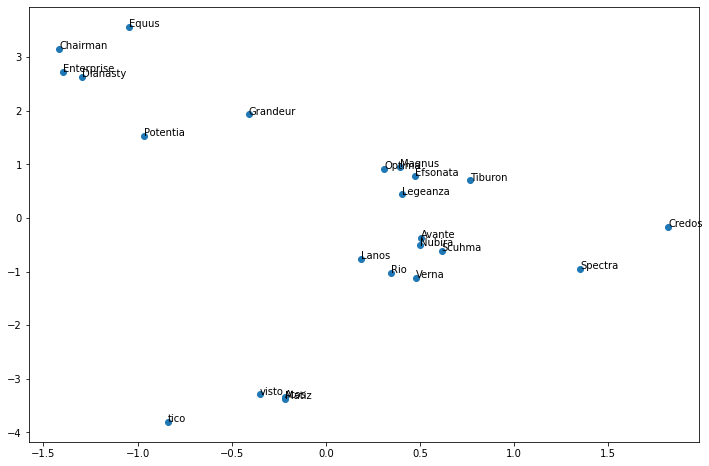

In [7]:
labels = auto.index
plt.figure(figsize=(12, 8))
plt.scatter(mds1[:, 0], mds1[:, 1])
for label, x, y in zip(labels, mds1[:, 0], mds1[:, 1]):
    plt.annotate(text=label, xy=(x, y), xycoords='data')

In [8]:
auto.head()

,length,width,enginesize,fuel,price
autoName,,,,,
visto,3495,1495,798,21.5,540
tico,3340,1400,796,21.0,550
Matiz,3495,1495,796,22.2,555
Atos,3495,1495,798,22.0,571
Spectra,4510,1720,1493,20.8,540


In [9]:
scaler = StandardScaler()
zauto = scaler.fit_transform(auto)
zauto

array([[-1.83077769, -1.75076166, -1.41560794,  1.36328455, -0.8280921 ],
       [-2.12684131, -2.51052616, -1.418249  ,  1.25926536, -0.81889951],
       [-1.83077769, -1.75076166, -1.418249  ,  1.50891142, -0.81430322],
       [-1.83077769, -1.75076166, -1.41560794,  1.46730374, -0.79959508],
       [ 0.10796149,  0.04868056, -0.49783973,  1.21765769, -0.8280921 ],
       [ 0.07931017, -0.11126986, -0.49123708,  0.21907346, -0.56150711],
       [ 0.10796149,  0.04868056, -0.49519867,  0.11505427, -0.54312194],
       [-0.45551443, -0.31120788, -0.49783973,  0.406308  , -0.67365666],
       [-0.40776223, -0.19124507, -0.49123708,  0.11505427, -0.57529599],
       [-0.41731267, -0.35119549, -0.49519867,  0.53113103, -0.79591805],
       [ 0.04110841, -0.11126986, -0.49123708,  0.21907346, -0.77293658],
       [ 0.55683214,  0.52853182,  0.16902781,  1.21765769, -0.89887501],
       [ 0.60458433,  0.80844506,  0.16902781, -0.28021865,  0.04979983],
       [ 0.41357555,  0.52853182, -0.0

In [10]:
zauto_dist = pairwise_distances(zauto, metric='euclidean')
mds = MDS(n_components=2, metric=True, random_state=0, dissimilarity='precomputed').fit(zauto_dist)
zauto_mds = mds.fit_transform(zauto_dist)
zauto_mds

c:\Users\admin\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


array([[-0.34905181, -3.28703158],
       [-0.83761076, -3.8051683 ],
       [-0.21473922, -3.36895701],
       [-0.21848629, -3.34503557],
       [ 1.35147266, -0.95643153],
       [ 0.49767976, -0.51291392],
       [ 0.50707511, -0.36597709],
       [ 0.34797204, -1.01971192],
       [ 0.18726058, -0.76804334],
       [ 0.47821419, -1.11757088],
       [ 0.61473484, -0.61008521],
       [ 1.81770445, -0.16049355],
       [ 0.39187547,  0.9564402 ],
       [ 0.40532146,  0.43730817],
       [ 0.47273881,  0.78001901],
       [ 0.763788  ,  0.69810637],
       [ 0.3108764 ,  0.91663491],
       [-0.96472974,  1.53139889],
       [-0.40974763,  1.92805211],
       [-1.294658  ,  2.62882412],
       [-1.39827723,  2.7271656 ],
       [-1.41539024,  3.1488329 ],
       [-1.04402284,  3.56463762]])

In [11]:
mds.stress_

3.562167703051256

In [12]:
zauto_dist = pairwise_distances(zauto, metric='euclidean')
mds = MDS(n_components=2, metric=True, random_state=0, dissimilarity='euclidean').fit(zauto)
zauto_mds = mds.fit_transform(zauto)
zauto_mds

c:\Users\admin\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


array([[-0.34905181, -3.28703158],
       [-0.83761076, -3.8051683 ],
       [-0.21473922, -3.36895701],
       [-0.21848629, -3.34503557],
       [ 1.35147266, -0.95643153],
       [ 0.49767976, -0.51291392],
       [ 0.50707511, -0.36597709],
       [ 0.34797204, -1.01971192],
       [ 0.18726058, -0.76804334],
       [ 0.47821419, -1.11757088],
       [ 0.61473484, -0.61008521],
       [ 1.81770445, -0.16049355],
       [ 0.39187547,  0.9564402 ],
       [ 0.40532146,  0.43730817],
       [ 0.47273881,  0.78001901],
       [ 0.763788  ,  0.69810637],
       [ 0.3108764 ,  0.91663491],
       [-0.96472974,  1.53139889],
       [-0.40974763,  1.92805211],
       [-1.294658  ,  2.62882412],
       [-1.39827723,  2.7271656 ],
       [-1.41539024,  3.1488329 ],
       [-1.04402284,  3.56463762]])

In [13]:
mds.dissimilarity_matrix_

array([[0.        , 0.82207495, 0.14630206, 0.10785208, 2.80360618,
        2.92764702, 3.07947105, 2.39700167, 2.63315613, 2.34463999,
        2.8911267 , 3.66512583, 4.29690525, 3.88988365, 4.1640819 ,
        3.88202793, 4.25229146, 5.01312698, 5.26191996, 6.05036558,
        6.16684791, 6.55049336, 6.79376626],
       [0.82207495, 0.        , 0.8527837 , 0.8417573 , 3.52034821,
        3.55403099, 3.71230074, 3.03745278, 3.24995545, 2.99464969,
        3.52134913, 4.35494564, 4.91124762, 4.49913714, 4.79057558,
        4.45822274, 4.87139339, 5.45121379, 5.77806598, 6.49513456,
        6.60606189, 6.97831922, 7.25113079],
       [0.14630206, 0.8527837 , 0.        , 0.04420976, 2.81582564,
        2.98719064, 3.14087581, 2.45892926, 2.70488046, 2.40105877,
        2.95239483, 3.67522629, 4.35288817, 3.95506924, 4.21960016,
        3.95663951, 4.30501829, 5.08392315, 5.32948287, 6.11348515,
        6.22980114, 6.61423647, 6.84717161],
       [0.10785208, 0.8417573 , 0.04420976, 0.   

In [14]:
# 왜 소수점이 아니라 1 이상의 수가 나오지..?
mds.stress_

3.562167703051256

In [17]:
for i in range(2, 5):
    mds = MDS(n_components=i, metric=True, random_state=0, dissimilarity='euclidean').fit(zauto)
    print(mds.stress_)

3.562167703051256
1.3508858017475125
0.41607323037913435


c:\Users\admin\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
